In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from __future__ import print_function
import numpy as np # linear algebra
import tensorflow as tf
import tensorflow.keras
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm,skew
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from fancyimpute import KNN
from sklearn.linear_model import SGDRegressor 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from functools import reduce
rng = np.random

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Using TensorFlow backend.


/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:


train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train




,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.00,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.00,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.00,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.00,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.00,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.00,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.00,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.00,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train['SalePrice'].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

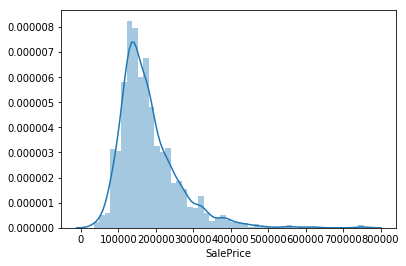

In [7]:
sns.distplot(train['SalePrice'])

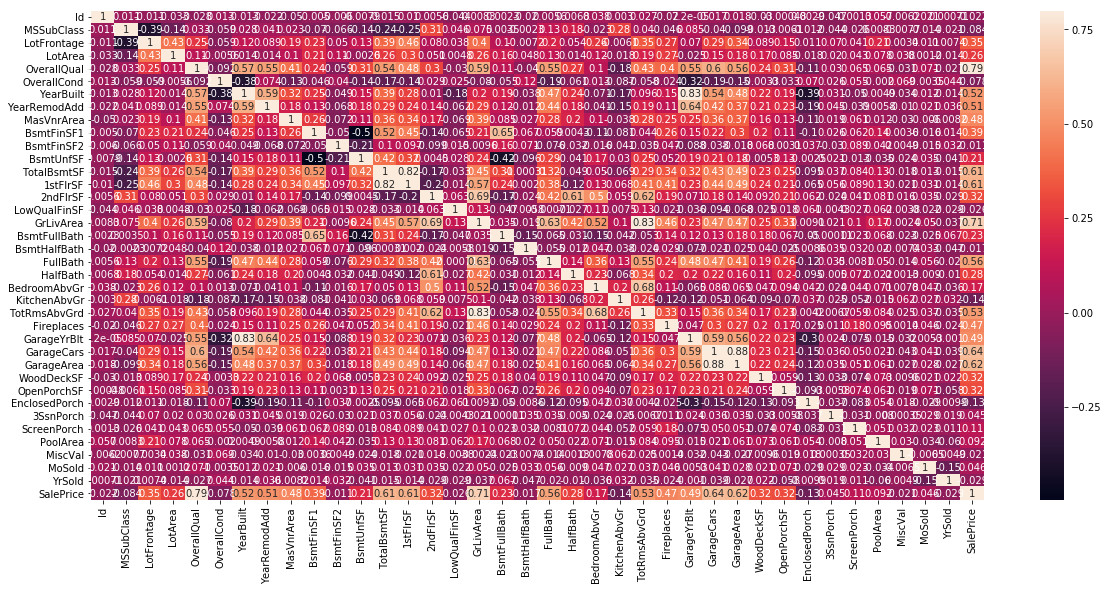

In [8]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

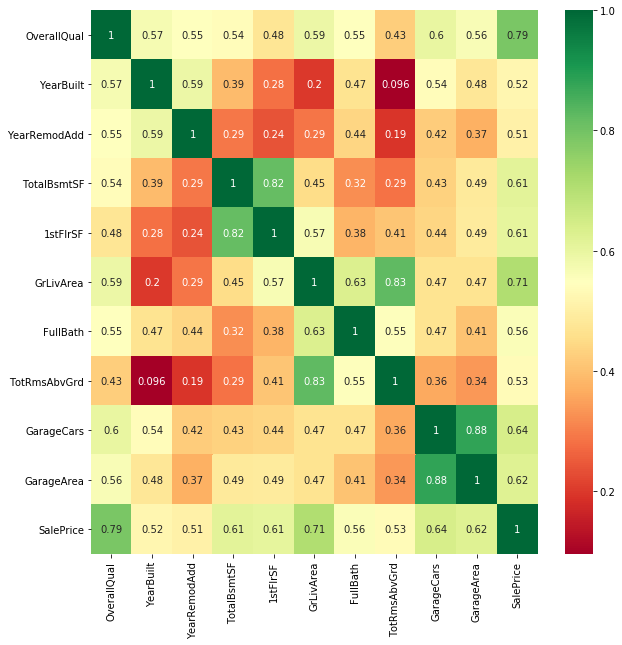

In [9]:
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
print("Skewness: %f" % train['SalePrice'].skew())#measure of symmetry
print("Kurtosis: %f" % train['SalePrice'].kurt())#measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

Skewness: 1.882876
Kurtosis: 6.536282


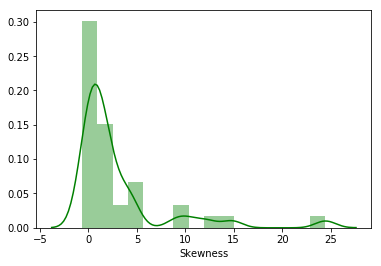

In [11]:
sns.distplot(train.skew(),color='green',axlabel ='Skewness')

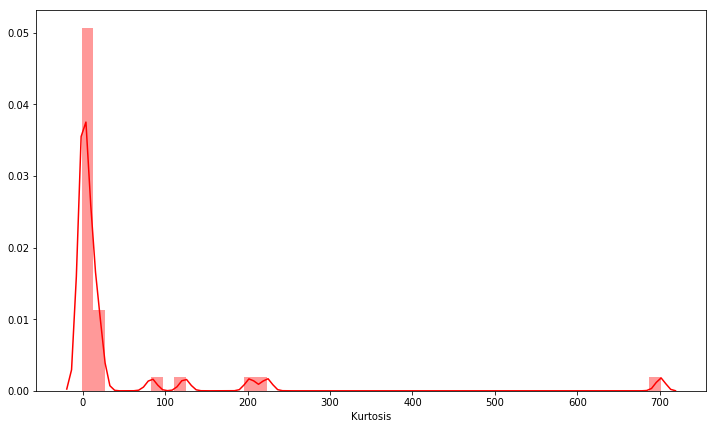

In [12]:
plt.figure(figsize=(12,7))
sns.distplot(train.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)

In [13]:
train.shape

(1460, 81)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


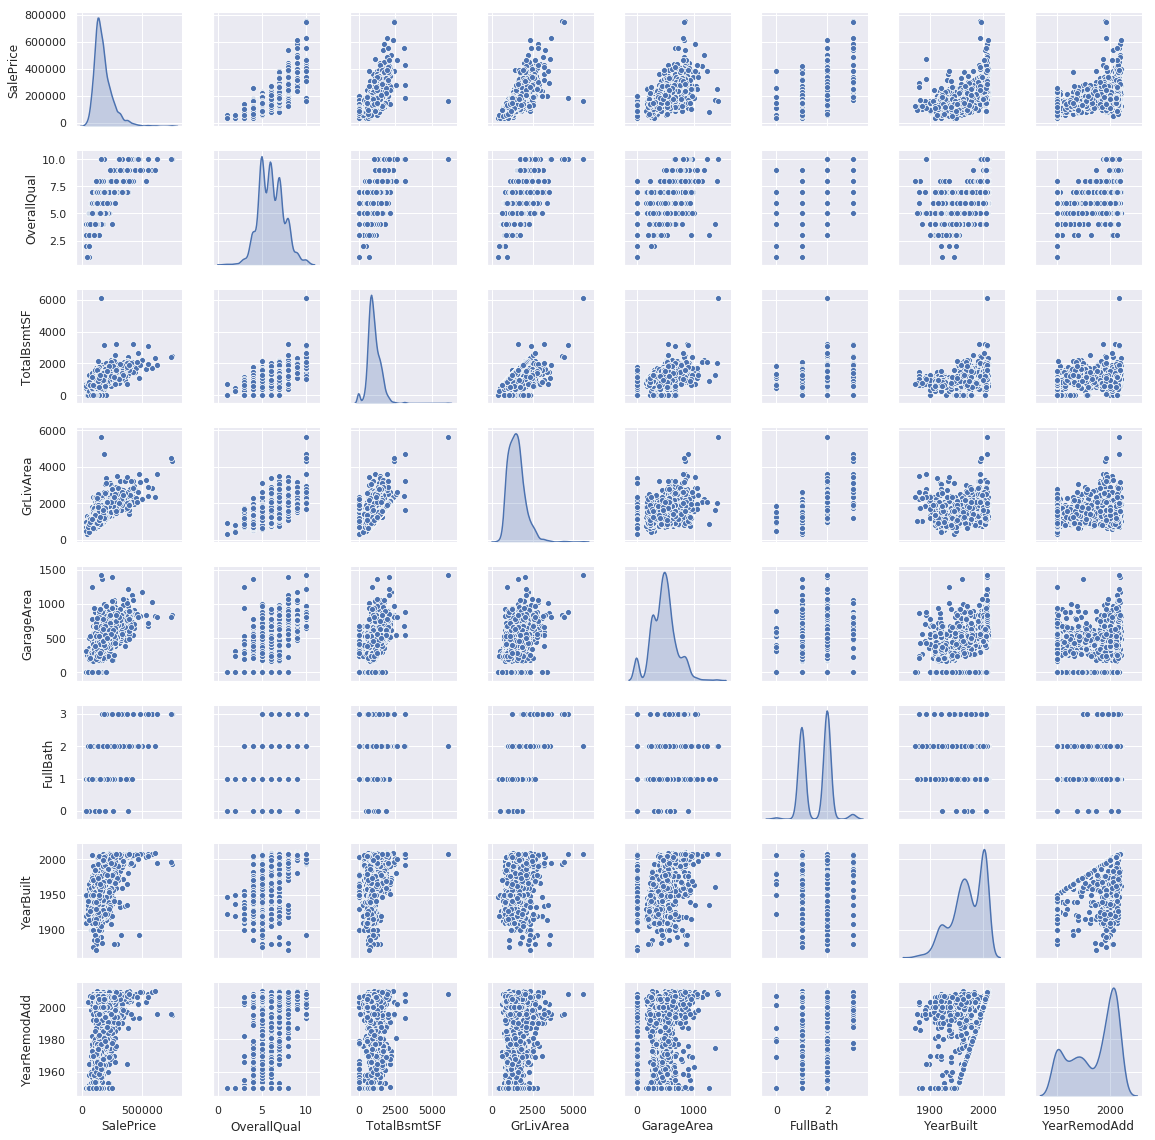

In [14]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

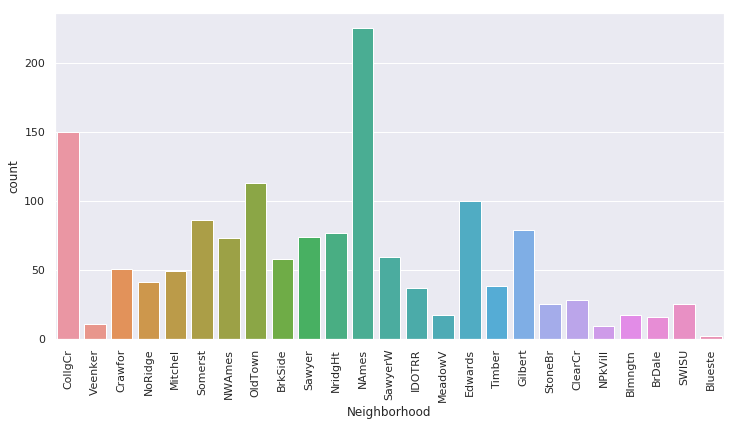

In [15]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = train)
xt = plt.xticks(rotation=90)

In [16]:
colnames_cont=train.iloc[:,1:-1].select_dtypes(include=np.number).columns.tolist()
print('numerical features')
print(colnames_cont)
print("number of numerics features = ",len(colnames_cont))

numerical features
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
number of numerics features =  36


In [17]:
#missing data
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing=pd.concat([total,percent], axis=1,keys=['total','percent'])
missing.head(30)

,total,percent
PoolQC,1453,1.00
MiscFeature,1406,0.96
Alley,1369,0.94
Fence,1179,0.81
FireplaceQu,690,0.47
...,...,...
Exterior2nd,0,0.00
Exterior1st,0,0.00
RoofMatl,0,0.00
RoofStyle,0,0.00


In [18]:
train.shape

(1460, 81)

In [19]:
#dropping the missing
train_df=train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea','MasVnrType','Electrical'], axis=1)
train_df.shape

(1460, 62)

In [20]:
#KNN (K Nearest Neighbors) with number of neighbors = 5 to impute missing values.
train_df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [21]:
print(len(train_df.columns))

62


In [22]:
#continous features
colnames_cont=train_df.iloc[:,1:-1].select_dtypes(include=np.number).columns.tolist()
print('numerical features')
print(colnames_cont)
print("number of numerics features = ",len(colnames_cont))

numerical features
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
number of numerics features =  33


In [23]:
#imputing
train_df[colnames_cont]=KNN(k=5).fit_transform(train_df[colnames_cont])

/opt/conda/lib/python3.6/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/1460 with 0 missing, elapsed time: 0.546
Imputing row 101/1460 with 0 missing, elapsed time: 0.547
Imputing row 201/1460 with 0 missing, elapsed time: 0.548
Imputing row 301/1460 with 0 missing, elapsed time: 0.548
Imputing row 401/1460 with 0 missing, elapsed time: 0.549
Imputing row 501/1460 with 0 missing, elapsed time: 0.550
Imputing row 601/1460 with 0 missing, elapsed time: 0.550
Imputing row 701/1460 with 0 missing, elapsed time: 0.551
Imputing row 801/1460 with 0 missing, elapsed time: 0.551
Imputing row 901/1460 with 0 missing, elapsed time: 0.552
Imputing row 1001/1460 with 0 missing, elapsed time: 0.553
Imputing row 1101/1460 with 0 missing, elapsed time: 0.553
Imputing row 1201/1460 with 0 missing, elapsed time: 0.554
Imputing row 1301/1460 with 0 missing, elapsed time: 0.554
Imputing row 1401/1460 with 0 missing, elapsed time: 0.555


In [24]:
#categorical
colnames_cat=train_df.iloc[:,1:-1].select_dtypes(include='object').columns.tolist()
print('numerical features')
print(colnames_cat)
print("number of numerics features = ",len(colnames_cat))

numerical features
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
number of numerics features =  27


In [25]:


for categorical_col in colnames_cat:
    most_frequent = train_df[categorical_col].value_counts().idxmax()
    hasCol       = 'Has'+categorical_col
    
    #new col 
    train_df[hasCol] = pd.Series(len(train_df[categorical_col]), index=train_df.index)
    
    #set new col = 1
    train_df[hasCol] = 1
    
    #set new col = 0 if train_df[categorical_col] not empty
    train_df.loc[train_df[categorical_col].isnull(),hasCol] = 0
    
    #set data_train[categorical_col] = most_frequent if new col = 0
    #if location of new col = 0 this mean that data_train[categorical_col] in this location is empty
    train_df.loc[train_df[hasCol] == 0,categorical_col] = most_frequent
    
    #drop new col
    train_df = train_df.drop(hasCol, axis=1)
    
print('missing values of categorical features imputed successfully')    



missing values of categorical features imputed successfully


In [26]:
#null values
train_df.isnull().sum().max()

0

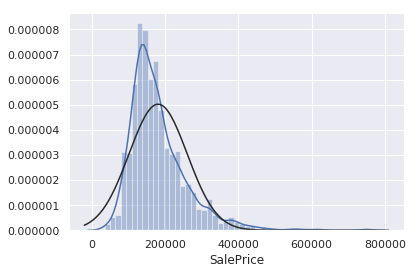

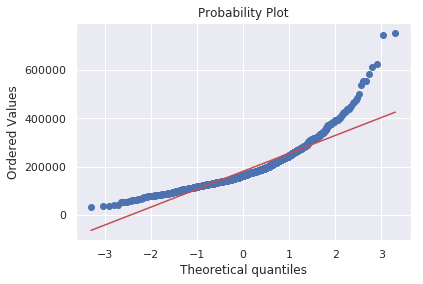

In [27]:
#outlier is an observation point that is distant from other observations.
#plotting outliers
sns.distplot(train_df['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

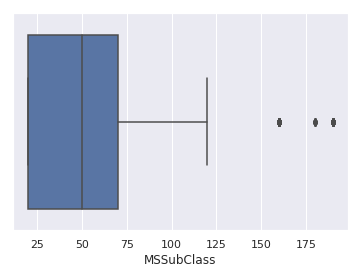

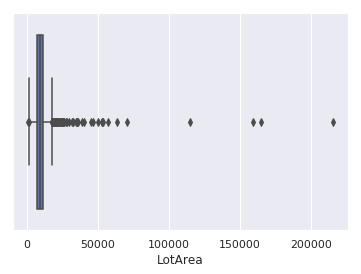

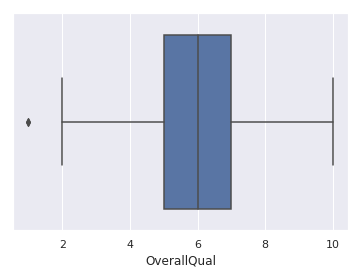

In [28]:
#anomaly or outliers
cols = ['MSSubClass','LotArea','OverallQual']
for col in cols:
    plt.figure()
    ax = sns.boxplot(x=train_df[col])

In [29]:
#interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
#IQR for numerical methods
Q1 = train_df[colnames_cont].quantile(0.25)
Q3 = train_df[colnames_cont].quantile(0.75)
IQR = Q3 - Q1

hasOutlier = (train_df[colnames_cont] < (Q1 - 1.5 * IQR)) | (train_df[colnames_cont] > (Q3 + 1.5 * IQR))
hasOutlier

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1458,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [30]:
#clean the outliers
num_data = train_df[colnames_cont]

for numeric_col in colnames_cont: 
    train_df = train_df.drop(train_df.loc[hasOutlier[numeric_col]].index)

In [31]:
# drop  rows which contain outliers data  
train_df.shape[0]

618

In [32]:
#feature selection
train_df = train_df.drop('Id', axis=1)
print('Id column deleted successfully')

Id column deleted successfully


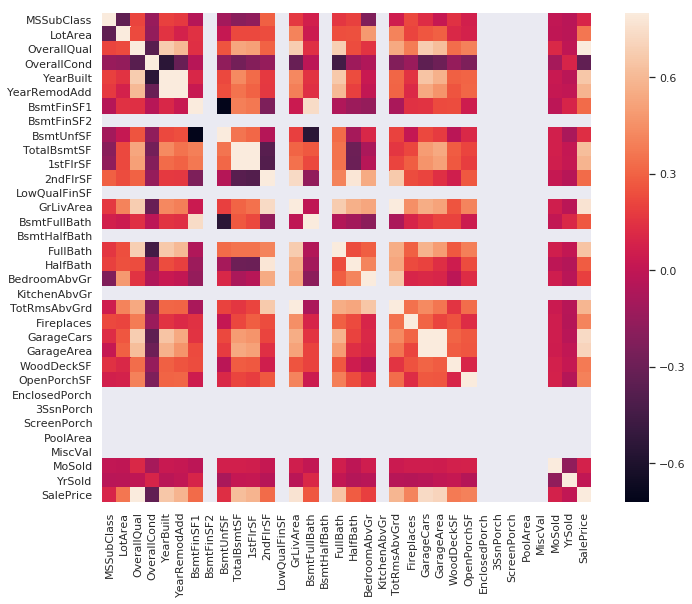

In [33]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


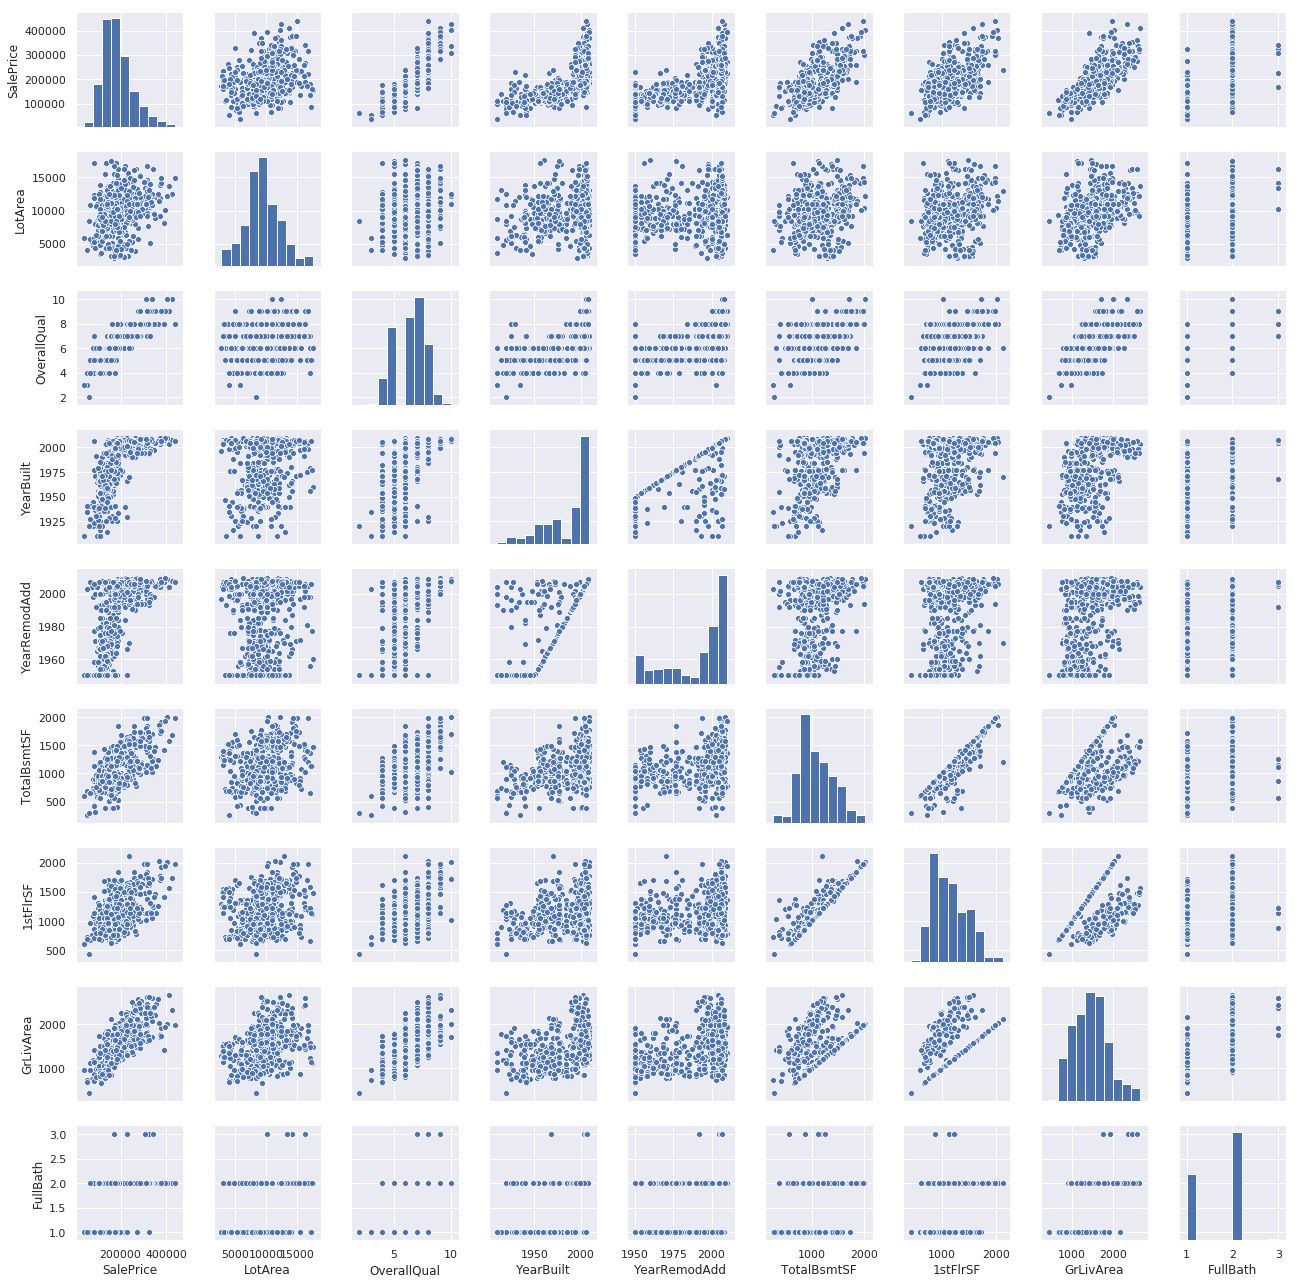

In [34]:
#scatterplot
sns.set()
cols = ['LotArea','OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF',
        'GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF']

group_1 = cols[0:8]
group_1.insert(0, "SalePrice")

#scatter plot of first group
sns.pairplot(train_df[group_1], size = 2)
plt.show();

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


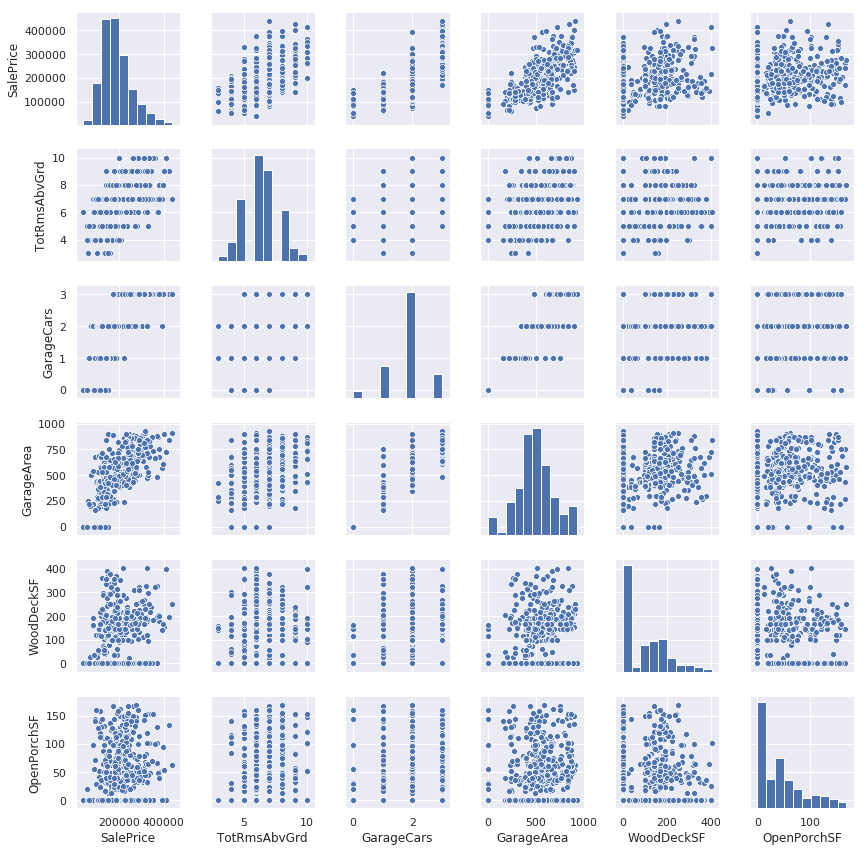

In [35]:
group_2 = cols[8:]
group_2.insert(0, "SalePrice")

#draw scatter plot of first group
sns.pairplot(train_df[group_2], size = 2)
plt.show();

In [36]:
# all numerical features in our data
allNumericalFeatures = colnames_cont

# numerical features which we use it in our model
selectedNumericalFeatures = cols

# numerical features that we will drop it
deletedFeatures =  list(set(allNumericalFeatures) - set(selectedNumericalFeatures))

print("data shape before delete features = ",train_df.shape)

# delete unwanted features
train_df = train_df.drop(deletedFeatures, axis=1)

print("data shape after delete features = ",train_df.shape)

print("unwanted features deleted successfully")

data shape before delete features =  (618, 61)
data shape after delete features =  (618, 41)
unwanted features deleted successfully


In [37]:
#convert categorical variable into lables
labelEncoder = LabelEncoder()

for categorical_col in colnames_cat:
    train_df[categorical_col] =  labelEncoder.fit_transform(train_df[categorical_col])
    
print("categorical columns converted successfully")

categorical columns converted successfully


In [38]:
colnames_cat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [39]:
#data scaling usind standardization
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
train_df[selectedNumericalFeatures] = scaler.fit_transform(train_df[selectedNumericalFeatures])

print("data scaling successfully")
train_df.describe()

data scaling successfully


,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,TotRmsAbvGrd,Functional,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
count,618.00,618.00,618.00,618.00,618.00,618.00,618.00,618.00,618.00,618.00,...,618.00,618.00,618.00,618.00,618.00,618.00,618.00,618.00,618.00,618.00
mean,1.96,0.00,1.00,1.78,2.81,0.00,3.12,0.03,10.05,2.06,...,0.00,3.96,0.00,0.00,1.94,-0.00,0.00,7.47,3.87,187959.50
std,0.54,1.00,0.04,1.46,0.65,0.00,1.56,0.17,6.27,0.79,...,1.00,0.29,1.00,1.00,0.32,1.00,1.00,1.50,1.04,66075.95
min,0.00,-2.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-2.52,0.00,-2.72,-2.56,0.00,-0.94,-0.95,0.00,0.00,37900.00
25%,2.00,-0.56,1.00,0.00,3.00,0.00,2.00,0.00,4.00,2.00,...,-0.30,4.00,0.18,-0.50,2.00,-0.94,-0.95,8.00,4.00,139612.50
50%,2.00,-0.09,1.00,3.00,3.00,0.00,4.00,0.00,10.00,2.00,...,-0.30,4.00,0.18,-0.04,2.00,0.04,-0.16,8.00,4.00,179570.00
75%,2.00,0.62,1.00,3.00,3.00,0.00,4.00,0.00,15.00,2.00,...,0.44,4.00,0.18,0.58,2.00,0.70,0.50,8.00,4.00,223875.00
max,3.00,2.90,1.00,3.00,3.00,0.00,4.00,1.00,22.00,8.00,...,2.65,4.00,1.63,2.27,2.00,3.02,2.79,8.00,5.00,440000.00


In [40]:
#training our data
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.40, random_state=55, shuffle =True)
print('data splitting successfully')

data splitting successfully


In [41]:
#model bulding
#
SGDRRegModel = SGDRegressor(random_state=55,loss = 'squared_loss')
SelectedParameters = {
                      'alpha':[0.1,0.5,0.01,0.05,0.001,0.005],
                      'max_iter':[100,500,1000,5000,10000],
                      'tol':[0.0001,0.00001,0.000001],
                      'penalty':['l1','l2','none','elasticnet']
                      }

GridSearchModel = GridSearchCV(SGDRRegModel,SelectedParameters, cv = 5,return_train_score=True)
GridSearchModel.fit(X_train,y_train)

SGDRRegModel = GridSearchModel.best_estimator_
SGDRRegModel.fit(X_train,y_train)
print('successfull')

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_mo

successfull


In [42]:
#ridge regression model==shrinkage regression==used when the data suffers from multicollinearity ( independent variables are highly correlated).
RidgeRegModel = Ridge(random_state= 55, copy_X=True)
SelectedParameters = {
                      'alpha':[0.1,0.5,0.01,0.05,0.001,0.005],
                      'normalize':[True,False],
                      'max_iter':[100,500,1000,5000,10000],
                      'tol':[0.0001,0.00001,0.000001],
                      'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
                      }

GridSearchModel = GridSearchCV(RidgeRegModel,SelectedParameters, cv = 5,return_train_score=True)
GridSearchModel.fit(X_train,y_train)

RidgeRegModel = GridSearchModel.best_estimator_
RidgeRegModel.fit(X_train,y_train)

print(" successfully")

 successfully


In [43]:
#lasso model run==Least Absolute Shrinkage and Selection Operator
LassoRegModel = Lasso(random_state= 55 ,copy_X=True)
SelectedParameters = {
                      'alpha':[0.1,0.5,0.01,0.05,0.001,0.005],
                      'normalize':[True,False],
                      'tol':[0.0001,0.00001,0.000001],
                      }

GridSearchModel = GridSearchCV(LassoRegModel,SelectedParameters, cv = 5,return_train_score=True)
GridSearchModel.fit(X_train,y_train)

LassoRegModel = GridSearchModel.best_estimator_
LassoRegModel.fit(X_train,y_train)

print(" successfully")

 successfully


In [44]:
#Linear regression model run
linearRegModel = LinearRegression(copy_X=True)
linearRegModel.fit(X_train,y_train)
print(" successfully")

 successfully


In [45]:
#decision Tree Regressor model run
decisionTreeModel = DecisionTreeRegressor(random_state=55)

SelectedParameters = {
                      'criterion': ['mse','friedman_mse','mae'] ,
                      'max_depth': [None,2,3,4,5,6,7,8,9,10],
                      'splitter' : ['best','random'],
                      'min_samples_split':[2,3,4,5,6,7,8,9,10],
                      }

GridSearchModel = GridSearchCV(decisionTreeModel,SelectedParameters, cv = 5,return_train_score=True)
GridSearchModel.fit(X_train,y_train)

decisionTreeModel = GridSearchModel.best_estimator_
decisionTreeModel.fit(X_train,y_train)

print(" successfully")

 successfully


In [46]:
#Xgboost Regressor model run==Extreme Gradient Boosting==uses the decisoin tree(parallelization and tree prunning) method and is fast
#boosting trains models in succession, with each new model being trained to correct the errors made by the previous ones.
XGBRModel = XGBRegressor(n_jobs = 4)

SelectedParameters = {
                      'n_estimators': [100,1000,10000] ,
                      'learning_rate': [0.1,0.5,0.01,0.05],
                      }

GridSearchModel = GridSearchCV(XGBRModel,SelectedParameters, cv = 5,return_train_score=True)
GridSearchModel.fit(X_train,y_train)

XGBRModel = GridSearchModel.best_estimator_
XGBRModel.fit(X_train,y_train)

print(" successfully")

[12:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/x

[12:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 successfully


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [47]:
#evaluating the model
models = [SGDRRegModel, RidgeRegModel, LassoRegModel, linearRegModel, decisionTreeModel,XGBRModel]

for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_train, y_train))
    print(type(model).__name__,' Test Score is    : ' ,model.score(X_test, y_test))
   

SGDRegressor  Train Score is   :  0.8197952542965896
SGDRegressor  Test Score is    :  0.7868615440738019
Ridge  Train Score is   :  0.8925326470537321
Ridge  Test Score is    :  0.8639746063670473
Lasso  Train Score is   :  0.8947643663417661
Lasso  Test Score is    :  0.8643993310267709
LinearRegression  Train Score is   :  0.8947672591213189
LinearRegression  Test Score is    :  0.8644756347379263
DecisionTreeRegressor  Train Score is   :  0.9652795186793633
DecisionTreeRegressor  Test Score is    :  0.7664333821316535
XGBRegressor  Train Score is   :  0.97726962318896
XGBRegressor  Test Score is    :  0.8596734765881096


In [48]:
#predicting
for model in models:
    print(type(model).__name__," error metrics")
    print('---------------------------------------------------------')
    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test,y_pred)
    print("mean absolute error = ",MAE)

    MSE = mean_squared_error(y_test,y_pred)
    print("mean squared error = ",MSE) 

    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    print("root mean squared error = ",RMSE) 
    print()

SGDRegressor  error metrics
---------------------------------------------------------
mean absolute error =  20586.3573653209
mean squared error =  918248172.1945773
root mean squared error =  30302.609989810735

Ridge  error metrics
---------------------------------------------------------
mean absolute error =  17266.073752064895
mean squared error =  586027840.6012136
root mean squared error =  24208.011909308323

Lasso  error metrics
---------------------------------------------------------
mean absolute error =  17548.662996447118
mean squared error =  584198031.7064158
root mean squared error =  24170.188905062696

LinearRegression  error metrics
---------------------------------------------------------
mean absolute error =  17547.04859416256
mean squared error =  583869298.2406709
root mean squared error =  24163.38755722531

DecisionTreeRegressor  error metrics
---------------------------------------------------------
mean absolute error =  22754.53666954685
mean squared error

In [49]:
#XGBRegressor has the minimal error since  new models are trained to predict the residuals (i.e errors) of prior models.
#this helps focusing on correcting the mistakes which were caused by other models

DEEP LEARNING USING TENSOR FLOW

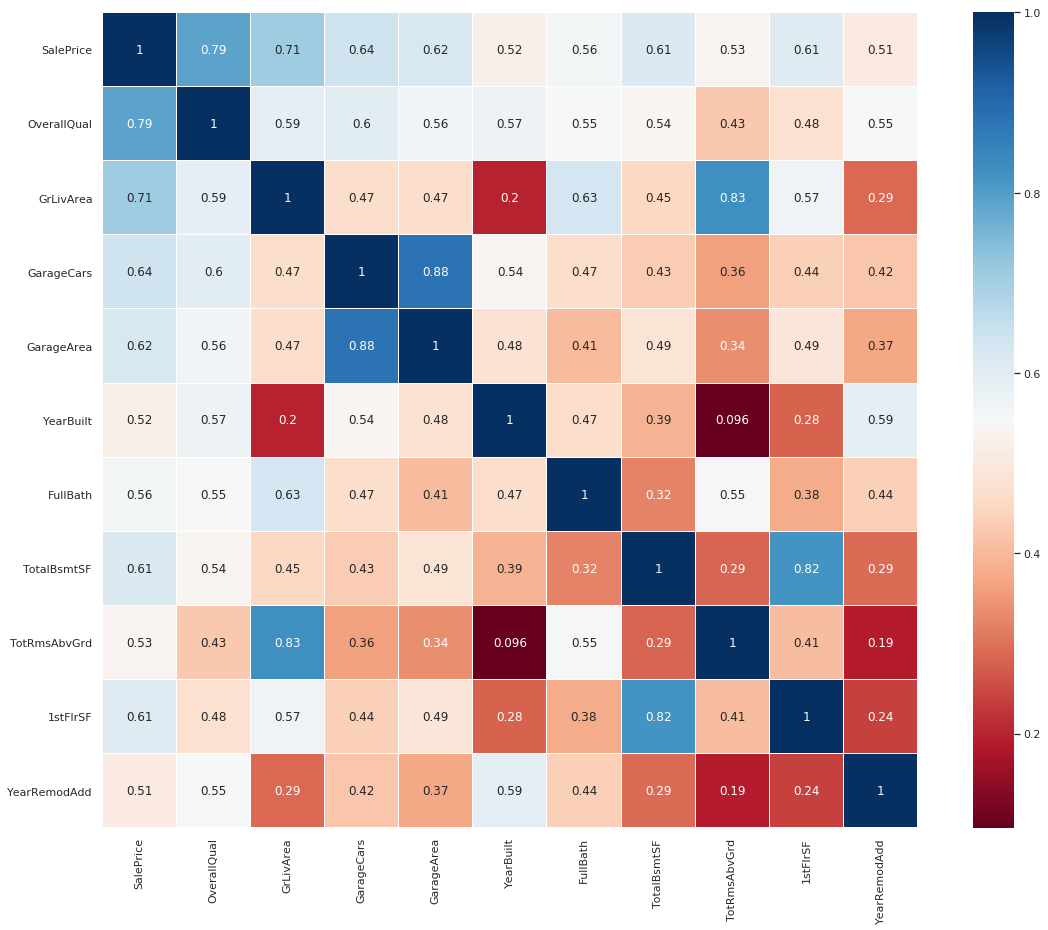

In [50]:

k=11

feature_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cmk = train[feature_cols].corr()
f, ax = plt.subplots(figsize=(20, 15))
colormap = plt.cm.RdBu
sns.heatmap(cmk,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)



/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


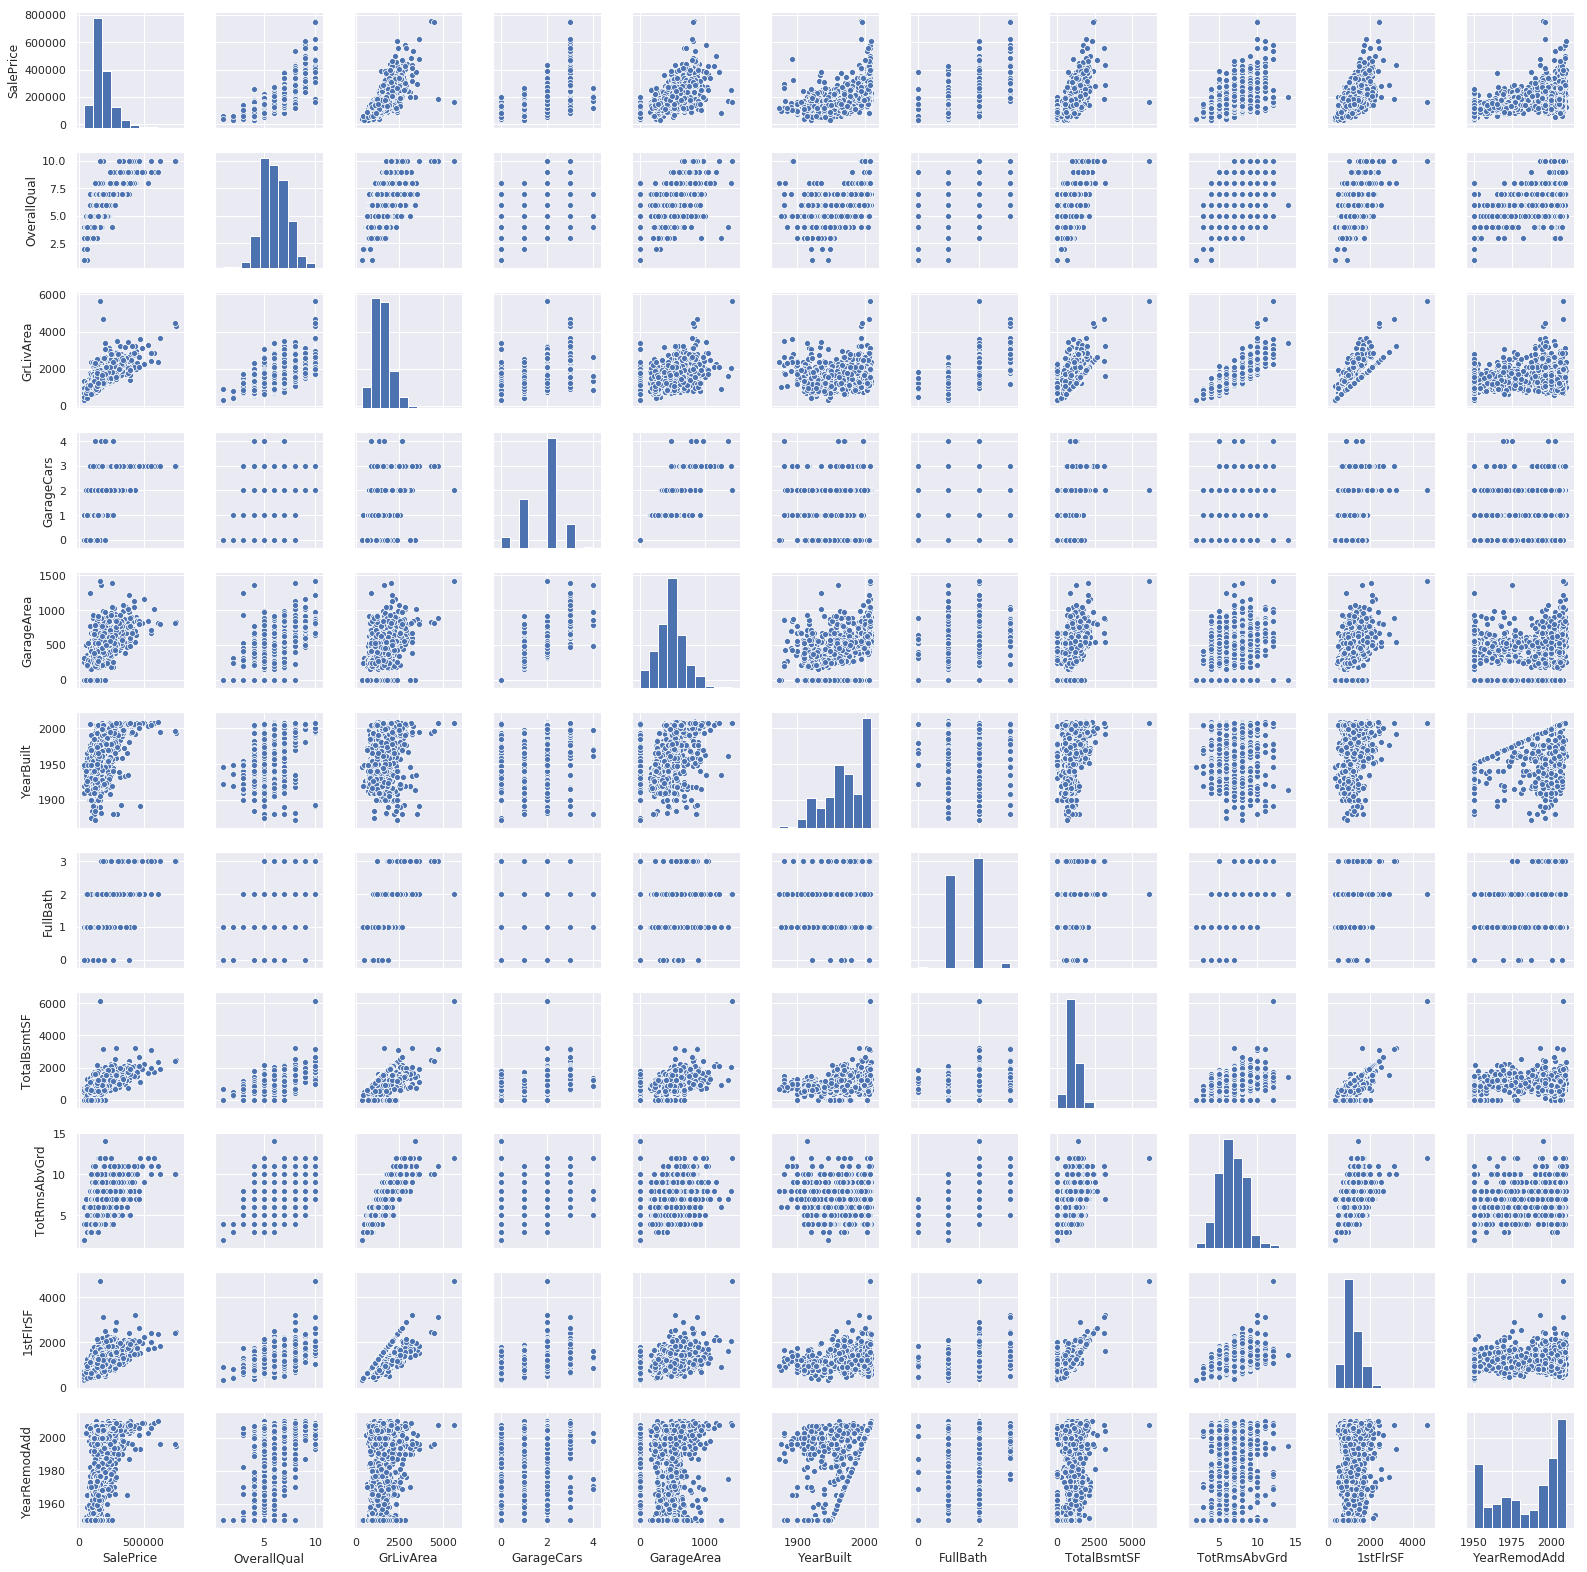

In [51]:
sns.set()
sns.pairplot(train[feature_cols], size = 2)
plt.show();

In [52]:
#feature engineering

train[feature_cols].head(10)



,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,YearBuilt,FullBath,TotalBsmtSF,TotRmsAbvGrd,1stFlrSF,YearRemodAdd
0,208500,7,1710,2,548,2003,2,856,8,856,2003
1,181500,6,1262,2,460,1976,2,1262,6,1262,1976
2,223500,7,1786,2,608,2001,2,920,6,920,2002
3,140000,7,1717,3,642,1915,1,756,7,961,1970
4,250000,8,2198,3,836,2000,2,1145,9,1145,2000
5,143000,5,1362,2,480,1993,1,796,5,796,1995
6,307000,8,1694,2,636,2004,2,1686,7,1694,2005
7,200000,7,2090,2,484,1973,2,1107,7,1107,1973
8,129900,7,1774,2,468,1931,2,952,8,1022,1950
9,118000,5,1077,1,205,1939,1,991,5,1077,1950


In [53]:
train[feature_cols].describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,YearBuilt,FullBath,TotalBsmtSF,TotRmsAbvGrd,1stFlrSF,YearRemodAdd
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,180921.20,6.10,1515.46,1.77,472.98,1971.27,1.57,1057.43,6.52,1162.63,1984.87
std,79442.50,1.38,525.48,0.75,213.80,30.20,0.55,438.71,1.63,386.59,20.65
min,34900.00,1.00,334.00,0.00,0.00,1872.00,0.00,0.00,2.00,334.00,1950.00
25%,129975.00,5.00,1129.50,1.00,334.50,1954.00,1.00,795.75,5.00,882.00,1967.00
50%,163000.00,6.00,1464.00,2.00,480.00,1973.00,2.00,991.50,6.00,1087.00,1994.00
75%,214000.00,7.00,1776.75,2.00,576.00,2000.00,2.00,1298.25,7.00,1391.25,2004.00
max,755000.00,10.00,5642.00,4.00,1418.00,2010.00,3.00,6110.00,14.00,4692.00,2010.00


In [54]:
#combining related features
def combine_feature(train):
    train['Garage'] = train['GarageCars'] * train['GarageArea']
    train['SF'] = train['TotalBsmtSF'] + train['1stFlrSF']
    train['TG'] = train['TotRmsAbvGrd'] * train['GrLivArea']

    
combine_feature(train)
combine_feature(test)
train = train.fillna(0)
test = test.fillna(0)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'YearBuilt', 'FullBath', 'TotalBsmtSF', 'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'Garage', 'SF', 'TG']


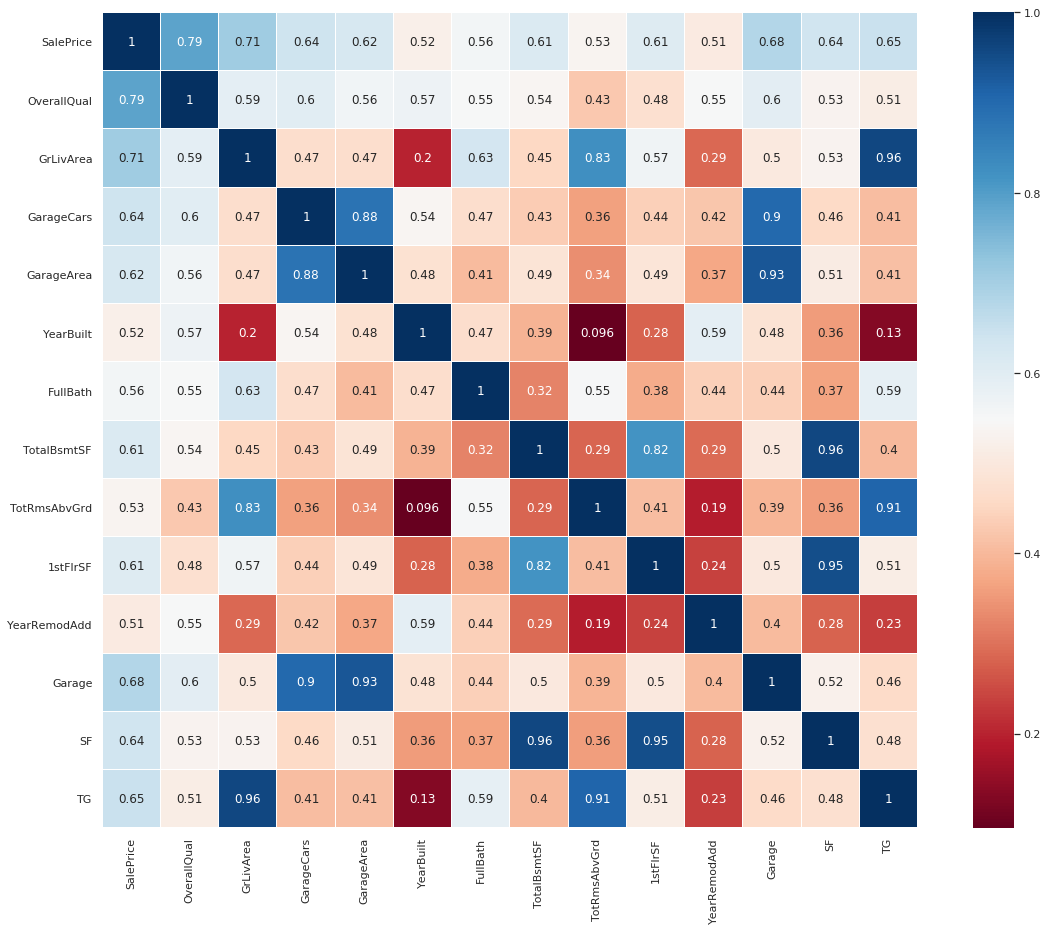

In [55]:
feature_cols2 = feature_cols.tolist()
feature_cols2.extend(['Garage','SF','TG'])
print(feature_cols2)
cmk2 = train[feature_cols2].corr()
f, ax = plt.subplots(figsize=(20, 15))
colormap = plt.cm.RdBu
sns.heatmap(cmk2,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [56]:
cols = feature_cols2
for e in ['SalePrice','GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF','TG']:
    cols.remove(e)

In [57]:
cols


['OverallQual',
 'GrLivArea',
 'YearBuilt',
 'FullBath',
 'TotRmsAbvGrd',
 'YearRemodAdd',
 'Garage',
 'SF']

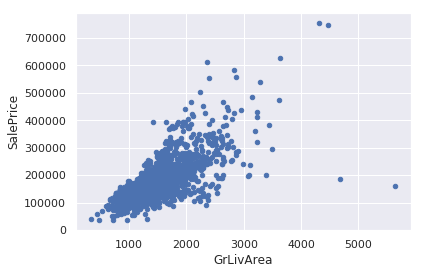

In [58]:

var = 'GrLivArea'
train.plot.scatter(x=var, y='SalePrice');




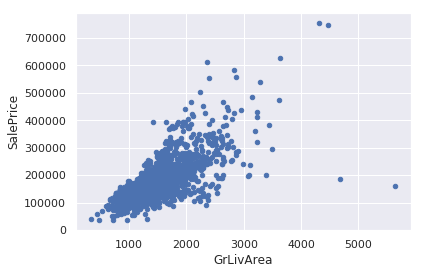

In [59]:
train.plot.scatter(x='GrLivArea', y='SalePrice');

In [60]:
train = train[train['GrLivArea']<4500]
train = train[train['SalePrice']< 700000]

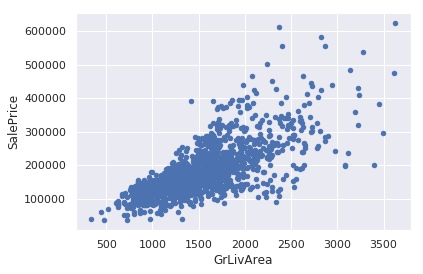

In [61]:
var = 'GrLivArea'
train.plot.scatter(x=var, y='SalePrice');

In [62]:
#machine learning with tensorflow
def normalize(data, col):
    data[col] = (data[col] - data[col].mean()) / (data[col].max() - data[col].mean())
    
def trans(data, feature_columns):
    trans = []
    for col in feature_columns:
        trans.append(list(data[col])) 
    return trans

In [63]:
training_example = train.head(1000)
validation_example = train.tail(train.shape[0] - 1000)
test_example = test.copy()

train.shape[0]

1456

In [64]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [65]:
learning_rate = 0.1
training_epochs = 100
display_step = 10

feature_columns = cols
features_num = len(feature_columns)

training_X = []
validation_X = []

for col in feature_columns:
    normalize(training_example, col)
    normalize(validation_example, col)
    normalize(test_example, col)

training_X = training_example[feature_columns]
validation_X = validation_example[feature_columns]
test_X = test_example[feature_columns]
#print(training_X)
training_Y = training_example['SalePrice']
validation_Y = validation_example['SalePrice']
n_samples = tf.placeholder(tf.float32)

X = tf.placeholder(tf.float32,[features_num, None])
Y = tf.placeholder(tf.float32)

W =  tf.Variable(tf.zeros([1, features_num],name="weight"))  
b = tf.Variable(tf.zeros([1]), name="bias")

pred = tf.add(tf.matmul(W, X), b)
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (n_samples)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optimizer = tf.train.MomentumOptimizer(learning_rate,momentum = 0.9).minimize(cost)
init = tf.compat.v1.global_variables_initializer()



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [66]:
tf.compat.v1.disable_eager_execution()

Epoch: 0010 cost= 1122819200.0 v_cost= 1221813800.0 W= [[72581.38   64440.086  10854.876   7508.2446 37385.582   9040.055
  51747.688  55066.96  ]] b= [181024.77]
Epoch: 0020 cost= 1037633300.0 v_cost= 1184132900.0 W= [[76120.53   76723.85   10234.951  -7231.5327 36103.43    8178.168
  61648.504  72523.53  ]] b= [181118.94]
Epoch: 0030 cost= 1018375550.0 v_cost= 1181487900.0 W= [[ 73746.766  84024.67   10455.354 -12296.806  32768.906   8349.236
   64657.25   81592.805]] b= [181155.2]
Epoch: 0040 cost= 1010377150.0 v_cost= 1180531800.0 W= [[ 71205.09   89406.78   10651.906 -14013.101  29244.615   8543.448
   65446.465  86899.98 ]] b= [181177.56]
Epoch: 0050 cost= 1006002000.0 v_cost= 1178211700.0 W= [[ 69327.3     93681.36    10788.202  -14658.113   25924.555    8677.9795
   65438.06    90166.41  ]] b= [181195.58]
Epoch: 0060 cost= 1003282000.0 v_cost= 1174923800.0 W= [[ 68045.63    97212.25    10883.496  -14945.0625  22942.494    8760.622
   65149.906   92215.7   ]] b= [181211.56]
Epoc

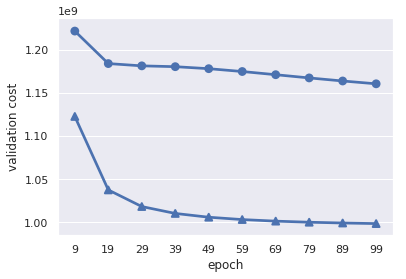

In [67]:
result = []
with tf.compat.v1.Session() as sess:
    sess.run(init)
    training_XT = sess.run(tf.transpose(training_X[feature_columns]))
    validation_XT = sess.run(tf.transpose(validation_X[feature_columns]))
    for epoch in range(training_epochs):
        for index, row in training_X.iterrows():
            x = [ [i] for i in row[feature_columns]]
            sess.run(optimizer, feed_dict={X: x, Y: training_Y[index], n_samples:training_Y.shape[0]})
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: training_XT, Y: training_Y, n_samples:training_Y.shape[0]})            
            vc = sess.run(cost, feed_dict={X: validation_XT, Y: validation_Y, n_samples:validation_Y.shape[0]})
            print("Epoch:", '%04d' % (epoch + 1), "cost=", c, "v_cost=", vc,"W=", sess.run(W), "b=", sess.run(b))
            result.append([epoch, c, vc])
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: training_XT, Y: training_Y, n_samples:training_Y.shape[0]})
    validation_cost = sess.run(cost, feed_dict={X: validation_XT, Y: validation_Y, n_samples:validation_Y.shape[0]})
    print("Training cost=", training_cost,"Validation cost=",validation_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    r = pd.DataFrame(result, columns = ['epoch', 'cost', 'validation cost']) 
    sns.pointplot(x="epoch",y="cost",data=r, markers="^")
    sns.pointplot(x="epoch",y="validation cost",data=r)
    
    p = sess.run(pred, feed_dict={X: trans(test_X,feature_columns)})
    print('pred: ',p)

In [68]:
tf.__version__

'2.1.0'

In [69]:
result = pd.DataFrame()
result['Id'] = test.Id
result['SalePrice'] = p[0]
result.head()

,Id,SalePrice
0,1461,128069.28
1,1462,162568.75
2,1463,171828.03
3,1464,189476.09
4,1465,215714.70
